In [8]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from cascading_failure.utils import *


### Prevention Mechanisms in the Simulations

In [6]:
filepath = "data/graph_ml_files/us_network.graphml" 
G = load_network(filepath)
simulation = initialize_simulation(G)

In [3]:
alpha_values = np.linspace(0, 0.6, 25)
prevention_mechanisms = ["None", "localized_capacity_boost", "dynamic_load_redistribution", "controlled_failure_isolation", "prevent_cascading_failure"]
num_simulations = 20

In [ ]:
results = run_prevention_mechanism_simulations(simulation, alpha_values, prevention_mechanisms, num_simulations)

In [ ]:
plot_prevention_mechanism_results(results, alpha_values, prevention_mechanisms, num_simulations, True)

In [ ]:
save_prevention_results_to_csv(results, alpha_values, num_simulations, "results/csv/prevention_mechanism_results.csv")

Currently at 1/10 for beta value 0.0
Currently at 1/10 for alpha value 0.0
Currently at 2/10 for alpha value 0.13333333333333333
Currently at 3/10 for alpha value 0.26666666666666666
Currently at 4/10 for alpha value 0.4
Currently at 5/10 for alpha value 0.5333333333333333
Currently at 6/10 for alpha value 0.6666666666666666
Currently at 7/10 for alpha value 0.8
Currently at 8/10 for alpha value 0.9333333333333333
Currently at 9/10 for alpha value 1.0666666666666667
Currently at 10/10 for alpha value 1.2
Currently at 2/10 for beta value 0.2222222222222222
Currently at 1/10 for alpha value 0.0
Currently at 2/10 for alpha value 0.13333333333333333
Currently at 3/10 for alpha value 0.26666666666666666
Currently at 4/10 for alpha value 0.4
Currently at 5/10 for alpha value 0.5333333333333333
Currently at 6/10 for alpha value 0.6666666666666666
Currently at 7/10 for alpha value 0.8
Currently at 8/10 for alpha value 0.9333333333333333
Currently at 9/10 for alpha value 1.0666666666666667
Curr

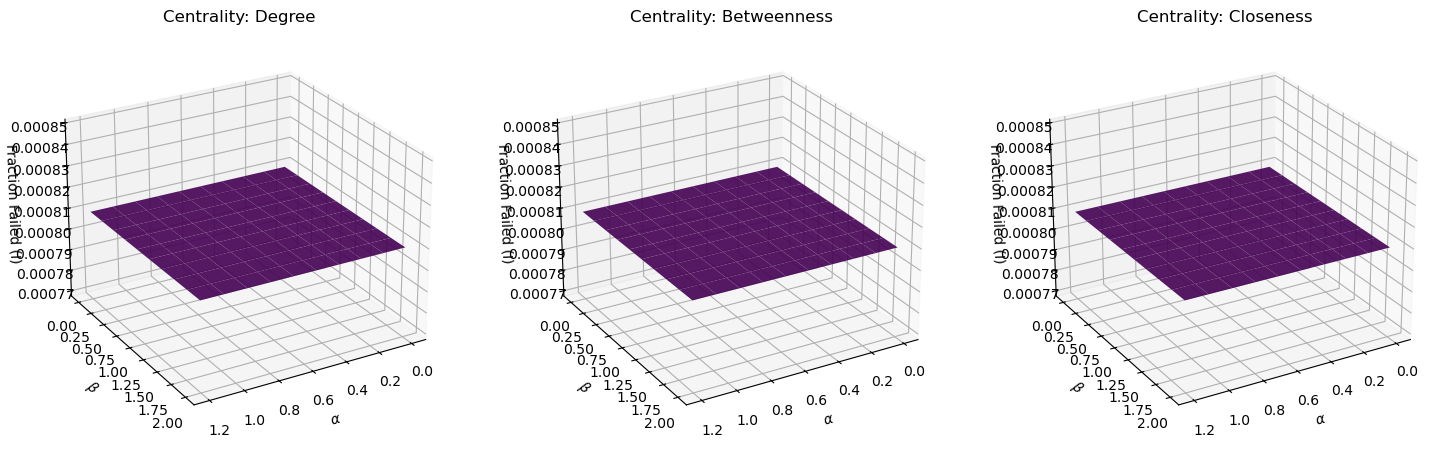

results saved to: us_network_3D_results.csv


In [17]:
df = pd.read_csv('results/csv/us_network_3D_results.csv')

alpha_vals = np.sort(df['alpha'].unique())
beta_vals = np.sort(df['beta'].unique())

A, B = np.meshgrid(alpha_vals, beta_vals)

Z = df.pivot(index='beta', columns='alpha', values='I').values

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(A, B, Z, cmap='viridis', edgecolor='none', alpha=0.8)

ax.set_xlabel(r"$\alpha$", fontsize=12)
ax.set_ylabel(r"$\beta$", fontsize=12)
ax.set_zlabel("Fraction Failed (I)", fontsize=12)
ax.set_title("Cascading Failure Fraction vs Alpha and Beta", fontsize=14)
    
fig.colorbar(surf)

# Show the plot
plt.show()

In [2]:
filepath = "data/graph_ml_files/toy_network_undirected.graphml"
G = nx.read_graphml(filepath)
mapping = {node: int(node) for node in G.nodes()}
G = nx.relabel_nodes(G, mapping)

In [5]:
filepath = "data/graph_ml_files/iceland.graphml"
G2 = load_network(filepath)

In [3]:
toy_capacity_list = np.linspace(61,110,40)
iceland_capacity_list = np.linspace(407,600,40)
us_capacity_list = np.linspace(13200, 30000, 10)
centrality_types = ["degree", "betweenness", "closeness"]

In [ ]:
toy_results = simulate_and_average_capacity(G, centrality_types, capacity_list=toy_capacity_list, target_attack=True)
plot_attack_graphs(toy_results, network_type="Toy Network, with Target Attack", capacity_list=toy_capacity_list, file_name="toy_capacity_target")
save_attack_results_to_csv(toy_results, fr"toy_capacity_target.csv", capacity_list=toy_capacity_list)


In [ ]:
iceland_results = simulate_and_average_capacity(G2, centrality_types, capacity_list=iceland_capacity_list, target_attack=True)
plot_attack_graphs(iceland_results, network_type="Iceland Network, with Target Attack", capacity_list=iceland_capacity_list, file_name="iceland_capacity_target")
save_attack_results_to_csv(iceland_results, fr"iceland_capacity_target.csv", capacity_list=iceland_capacity_list)


### Random vs Target Attacks

In [11]:
BA_ran = pd.read_csv("results/csv/BA_network_results_beta_ran.csv")
BA_tar = pd.read_csv("results/csv/BA_network_results_beta_tar.csv")
US_ran = pd.read_csv("results/csv/US_network_results_beta_ran.csv")
US_tar = pd.read_csv("results/csv/US_network_results_beta_tar.csv")

In [12]:
alpha = BA_ran["Alpha"]
BA_ran_mean = BA_ran ["degree_mean"]
BA_tar_mean = BA_tar ["degree_mean"]
US_ran_mean = US_ran["degree_mean"]
US_tar_mean = US_tar["degree_mean"]

BA_ran_std = BA_ran ["degree_std"]
US_ran_std = US_ran["degree_std"]

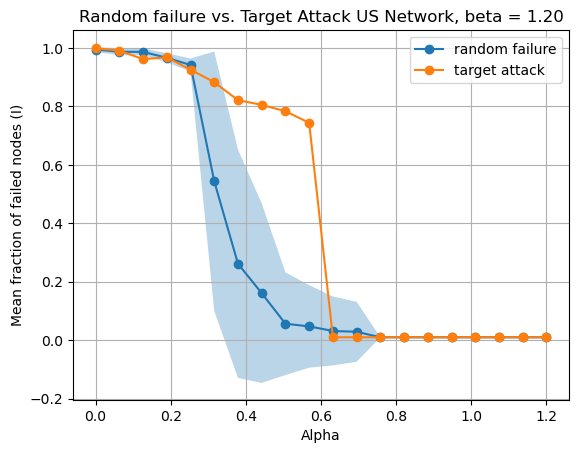

In [13]:
plt.plot(alpha, US_ran_mean, label="random failure", marker='o')
plt.fill_between(alpha, US_ran_mean - US_ran_std, US_ran_mean + US_ran_std, alpha=0.3)
plt.plot(alpha, US_tar_mean, label="target attack", marker='o')
plt.xlabel("Alpha")
plt.ylabel("Mean fraction of failed nodes (I)")
plt.title("Random failure vs. Target Attack US Network, beta = 1.20")
plt.grid()
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


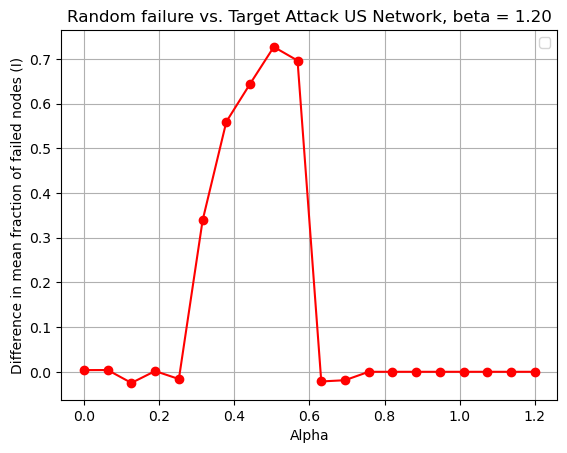

In [14]:
US_dif = US_tar_mean - US_ran_mean
plt.plot(alpha, US_dif, color = "red", marker='o')
plt.xlabel("Alpha")
plt.ylabel("Difference in mean fraction of failed nodes (I)")
plt.title("Random failure vs. Target Attack US Network, beta = 1.20")
plt.grid()
plt.legend()
plt.show()

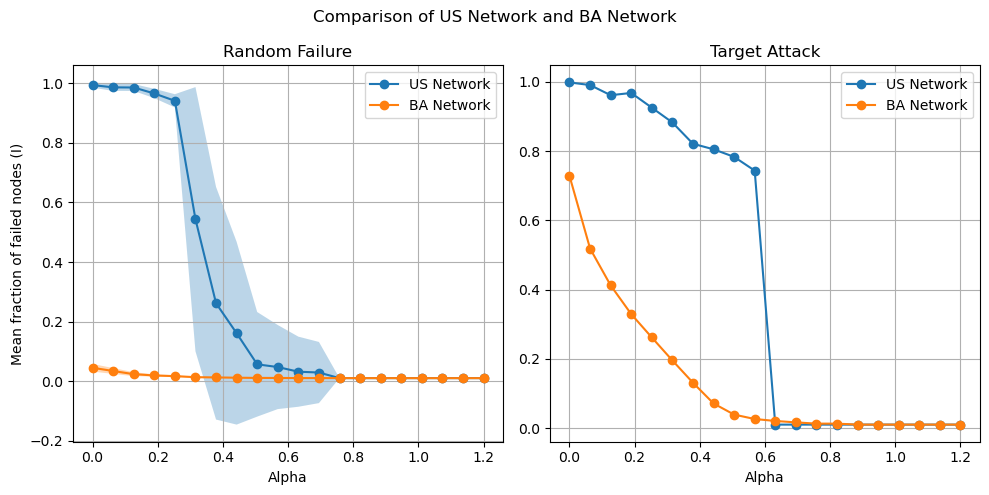

In [15]:
# plot the figures to compare the random failure and targeted attack on iceland network
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Degree Centrality Plot
axes[0].plot(alpha, US_ran_mean, label="US Network", marker='o')
axes[0].fill_between(alpha, US_ran_mean - US_ran_std, US_ran_mean + US_ran_std, alpha=0.3)
axes[0].plot(alpha, BA_ran_mean, label="BA Network", marker='o')
axes[0].fill_between(alpha, BA_ran_mean - BA_ran_std, BA_ran_mean + BA_ran_std, alpha=0.3)
axes[0].set_xlabel("Alpha")
axes[0].set_ylabel("Mean fraction of failed nodes (I)")
axes[0].set_title("Random Failure")
axes[0].grid()
axes[0].legend()

# Betweenness Centrality Plot
axes[1].plot(alpha, US_tar_mean, label="US Network", marker='o')
axes[1].plot(alpha, BA_tar_mean, label="BA Network", marker='o')
axes[1].set_xlabel("Alpha")
axes[1].set_title("Target Attack")
axes[1].grid()
axes[1].legend()


fig.suptitle("Comparison of US Network and BA Network")
plt.tight_layout()
plt.show()